<a href="https://colab.research.google.com/github/tracieschroeder/Participant-Notebooks/blob/main/Chemistry/In%20Progress/Integrated_Rate_Law_of_Food_Coloring_and_Bleach_Rxn_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Integrated Rate Law of Food Coloring and Bleach Rxn Data Analysis**

# **Purpose:**
**In this activity, you will be introduced to coding and its benefit to data analysis by importing and analyzing your food coloring and bleach reaction data**

#Intro to Coding and Data Analysis
We're going to work on a brief activity to help us learn some coding that's useful for data analysis.

By the end of this activity you should be able to:

*   Import python packages to help analyze data
*   Import csv files full of data from excel
*   Do simple math functions in python
*   Learn to **ALWAYS** label axes and graphs
*   Create a linear equation and perform calculations using code

#Let's Get Started!

Each block is different functions we need to accomplish our goals. Anything in green that follows a # isn't read by the computer. These are comments to help humans understand what that line of code is doing. Click the play sign to run the line of code. Some of the code is written incorrectly. Some has info you need to change. Look for comments to help!

#Step 1: Import functions needed to perform our data analysis

In [ ]:
# this cell only needs to be run once, all you have to do is click the play button!
# imports software packages (not too exciting)
import pandas as pd #pandas works with python to help us wrangle data. It can sort, clean, and read our csv files. csv files are how we input data
import numpy as np #numpy handles the math for us!
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt #these three functions will help us create our graphs!

#Step 2: Import your data from the lab
Now that you imported important functions we will use, let's import our data from the lab quest:

*   Connect the LabQuest and computer to the same WiFi network.
*   Open Graphical Analysis and select Data Sharing, then the Local tab.
*   Choose the LabQuest from the list or enter its URL.
*   Go to File > LabQuest Browser > Open.
*   Save in Google Sheets


In [ ]:
# when you click the play button, you might have to accept google permissions
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now that we have connected Colab to Sheets we need to access a specific sheet in your drive and pull data from it. To do this:

* Copy and paste the sheet link into the next cell where it says 'paste link here'. Keep the quotes.

* Replace the last portion of the link (edit?gid=0#gid=0) with (export?format=csv). This tells the computer that instead of editing the sheet, it is pulling the data from it.

* Call the data something. 'df' is short for dataframe. It is the variable we are going to use to represent our data. Any time you reference the data, you will use this variable.

In [ ]:
# Read in the lab data. This cell has no output.
# Create a variable called df (short for dataframe) and store the data in it
df = pd.read_csv('https://docs.google.com/spreadsheets/d/16mHrpOhpSMroaLMbn7m7PEw_2w_Oz2CAr41hzmZHtVY/export?format=csv')
data = df

Now that we have the data lets try to view some of it just to be sure everything is in order. Run the next cell to view the data.

In [ ]:
df.head(5) #shows the first (n) lines of data

,Time,Absorbance
0,0,2.272
1,20,2.157
2,40,1.816
3,60,1.317
4,80,0.958


In [ ]:
# .shape displays the (number of rows , number of columns)
data.shape

(10, 2)

#Step 3: Claculate your "y" variables for your first and second order graphs

Since you already have data for absorbance vs. time, you already have the data to create a zero order kinetics graph. We will now calculate the additional "y" variables to create first order (ln aborbance vs. time) and second order (1/absorbance vs. time) kinetics graphs.



**Creating ln absorbance data column**

1.   rename your column of data "ln absorbance"
2.   input the data name we will be taking the natural log of
3.   you can change the data head (n) to see a different number of data points



In [ ]:
# You can specify a column by data['column name']. This adds a column and fills it with ln absorbance values for each data point
data['ln absorbance'] = np.log (data['Absorbance'])
data.head(3)

,Time,Absorbance,ln absorbance
0,0,2.272,0.820661
1,20,2.157,0.768718
2,40,1.816,0.596636


**Creating 1/absorbance data column**

1. rename your column of data "1/absorbance"
2. input the data name we will be taking the reciprocal of
3. you can change the data head (n) to see a different number of data points

In [ ]:
# You can specify a column by data['column name']. This adds a column and fills it with ln absorbance values for each data point
data['1/absorbance'] =  (1/data['Absorbance'])
data.head(3)

,Time,Absorbance,ln absorbance,1/absorbance
0,0,2.272,0.820661,0.440141
1,20,2.157,0.768718,0.463607
2,40,1.816,0.596636,0.550661


#Step 4: Creating your integrated rate law graphs

Now that you have all the data needed, we will create a scatter plot that coorelates with each order.


**Zero Order Integrated Rate Law Graph**

Complete the lines of code below to create your absorbance vs. time graph

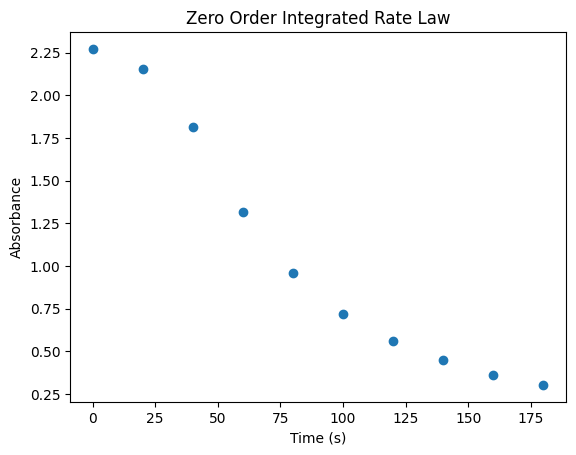

In [ ]:
x = data['Time ']
y = data['Absorbance']

plt.scatter(x, y)
plt.xlabel('Time (s)')
plt.ylabel('Absorbance')
plt.title('Zero Order Integrated Rate Law')
plt.show()

**First Order Integrated Rate Law Graph**

Complete the lines of code below to create your ln absorbance vs. time graph

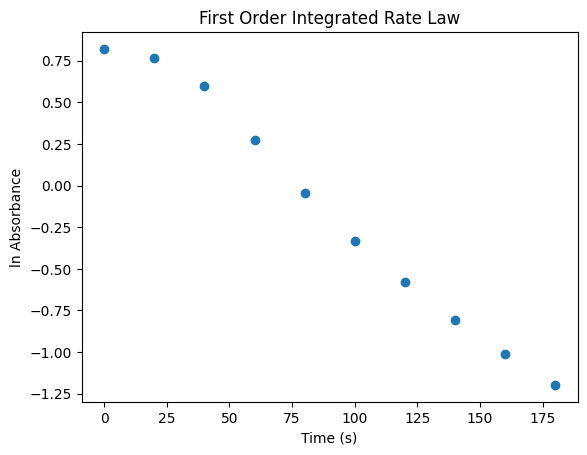

In [ ]:
x = data['Time ']
y = data['ln absorbance']

plt.scatter(x, y)
plt.xlabel('Time (s)')
plt.ylabel('ln Absorbance')
plt.title('First Order Integrated Rate Law') # Updated title
plt.show()

**Second Order Integrated Rate Law Graph**

Complete the lines of code below to create your 1/absorbance vs. time graph

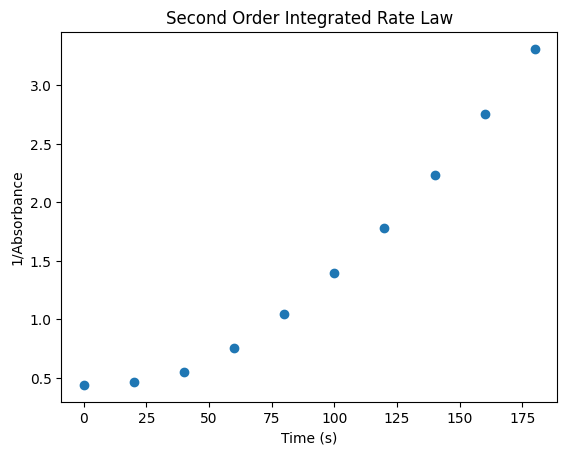

In [ ]:
x = data['Time ']
y = data['1/absorbance']

plt.scatter(x, y)
plt.xlabel('Time (s)')
plt.ylabel('1/Absorbance')
plt.title('Second Order Integrated Rate Law') # Updated title
plt.show()

# Step 5: Calculate R^2 values to analyze the kinetic order with respect to food coloring

Now we will run the following code to determine the R^2 values. The R^2 value that is closest to **1** indicates the most linear graph. The most linear graph determines the order of the food coloring in the reaction.

In [ ]:
# prompt: find the r^2 value of the above graph

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Zero Order
x_zero = data['Time '].values.reshape(-1, 1) # Reshape for scikit-learn
y_zero = data['Absorbance'].values

model_zero = LinearRegression()
model_zero.fit(x_zero, y_zero)
y_pred_zero = model_zero.predict(x_zero)
r2_zero = r2_score(y_zero, y_pred_zero)

print(f"R^2 value for Zero Order graph: {r2_zero}")

# First Order
x_first = data['Time '].values.reshape(-1, 1)
y_first = data['ln absorbance'].values

model_first = LinearRegression()
model_first.fit(x_first, y_first)
y_pred_first = model_first.predict(x_first)
r2_first = r2_score(y_first, y_pred_first)

print(f"R^2 value for First Order graph: {r2_first}")

# Second Order
x_second = data['Time '].values.reshape(-1, 1)
y_second = data['1/absorbance'].values

model_second = LinearRegression()
model_second.fit(x_second, y_second)
y_pred_second = model_second.predict(x_second)
r2_second = r2_score(y_second, y_pred_second)

print(f"R^2 value for Second Order graph: {r2_second}")

R^2 value for Zero Order graph: 0.9312727084989814
R^2 value for First Order graph: 0.9890784853110249
R^2 value for Second Order graph: 0.9368904388206087


In [ ]:
# prompt: print the order with respect to food coloring

# Determine the order with the highest R^2 value
max_r2 = max(r2_zero, r2_first, r2_second)

if max_r2 == r2_zero:
  order = "Zero Order"
elif max_r2 == r2_first:
  order = "First Order"
else:
  order = "Second Order"

print(f"The order with the highest R^2 value ({max_r2:.4f}) with respect to food coloring is {order}")

The order with the highest R^2 value (0.9891) with respect to food coloring is First Order


# Step 6: Create your linear equation for the order with respect to food coloring

Now you will determine the slope of the most linear graph and use that value to create your linear equation.

In [ ]:
# prompt: find the slope of the First Order graph

# Find the slope (k) of the First Order graph
# The slope of the linear regression model for the First Order graph is the reaction rate constant k.
slope_first = model_first.coef_[0]

print(f"Slope (k) of the First Order graph: {slope_first}")

Slope (k) of the First Order graph: -0.01227136475631425


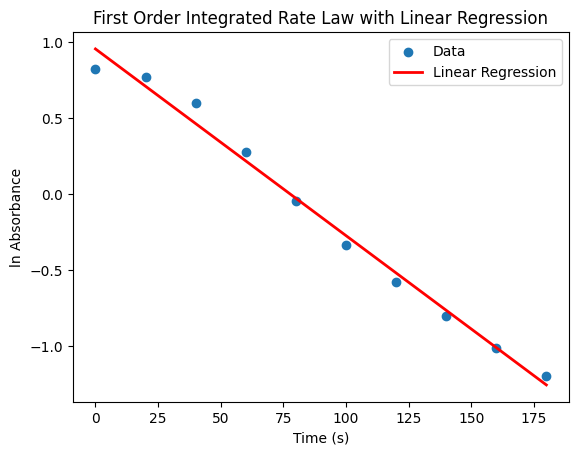

Linear equation for First Order graph: ln(Absorbance) = -0.0123 * Time + 0.9536


In [ ]:
# prompt: create linear equation for First Order graph

import matplotlib.pyplot as plt
# Add the linear regression line to the First Order graph
plt.scatter(x_first, y_first, label='Data')
plt.plot(x_first, y_pred_first, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Time (s)')
plt.ylabel('ln Absorbance')
plt.title('First Order Integrated Rate Law with Linear Regression')
plt.legend()
plt.show()

# Print the linear equation for the First Order graph
# The equation of a line is y = mx + c, where m is the slope and c is the intercept.
# In this case, y is ln(Absorbance) and x is Time.
intercept_first = model_first.intercept_
print(f"Linear equation for First Order graph: ln(Absorbance) = {slope_first:.4f} * Time + {intercept_first:.4f}")

# Step 7: Extrapolate Data using your linear equation

Using your linear equation generated above, answer the following questions. Then, use the following code to **check** your answers:

# 1. Determine the absorbance of food coloring at 200 seconds.
# 2. Determine the time required for the absorbance to reach 0.150

In [ ]:
# prompt: use linear equation from above to determine the absorbance at 200 seconds

import numpy as np
# Using the linear equation for the First Order graph to predict absorbance at 200 seconds
# The equation is ln(Absorbance) = slope * Time + intercept
# We need to find Absorbance at Time = 200 seconds
time_at_200s = 200
# Calculate the predicted ln(Absorbance) at 200 seconds
ln_absorbance_at_200s = slope_first * time_at_200s + intercept_first

# To get the Absorbance, we need to take the exponential of the result (e^ln(Absorbance))
absorbance_at_200s = np.exp(ln_absorbance_at_200s)

print(f"Predicted absorbance at 200 seconds (based on First Order kinetics): {absorbance_at_200s:.4f}")

Predicted absorbance at 200 seconds (based on First Order kinetics): 0.2230


In [ ]:
# prompt: calculate the time required for absorbance to reach 0.150

import numpy as np
# Calculate the time required for the absorbance to reach 0.150
# We are using the First Order linear equation: ln(Absorbance) = slope * Time + intercept
# We want to find Time when Absorbance = 0.150
# Rearranging the equation to solve for Time:
# Time = (ln(Absorbance) - intercept) / slope

target_absorbance = 0.150

# Calculate ln(target_absorbance)
ln_target_absorbance = np.log(target_absorbance)

# Use the slope and intercept from the First Order model
time_to_reach_0_150 = (ln_target_absorbance - intercept_first) / slope_first

print(f"Predicted time required for absorbance to reach {target_absorbance} (based on First Order kinetics): {time_to_reach_0_150:.4f} seconds")

Predicted time required for absorbance to reach 0.15 (based on First Order kinetics): 232.3075 seconds


#Congratulations!
# You have now learned a few things about coding  and how it relates to data analysis in Kinetics!